Saving RELIANCE.csv to RELIANCE (5).csv

📊 Model Evaluation for: RELIANCE (5).csv
MAE   (Mean Absolute Error)       : 25.83
RMSE  (Root Mean Squared Error)   : 36.66
✅ Model Accuracy (R² Score)       : 98.96%


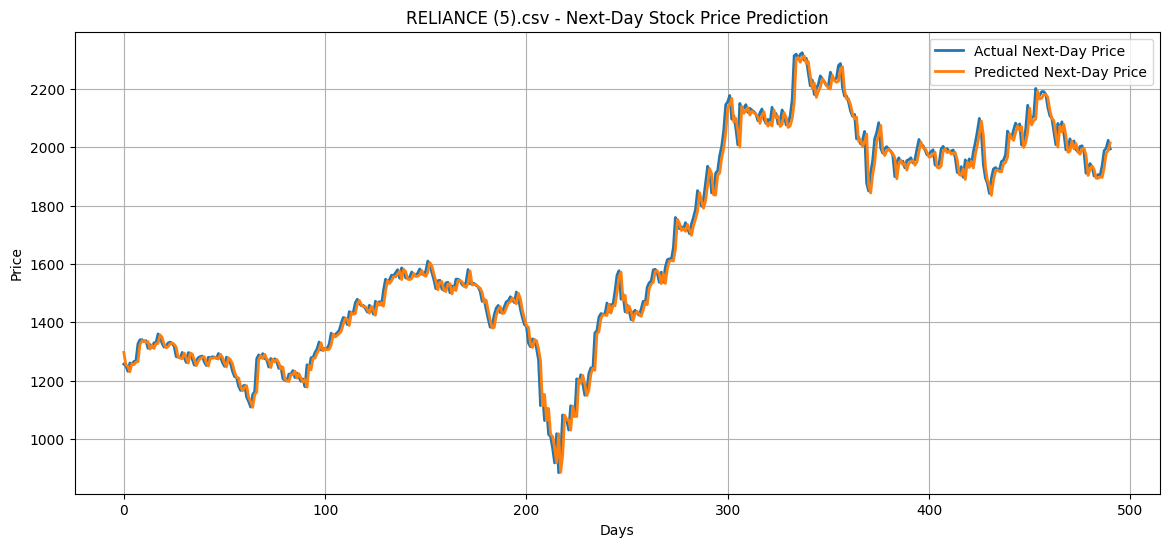

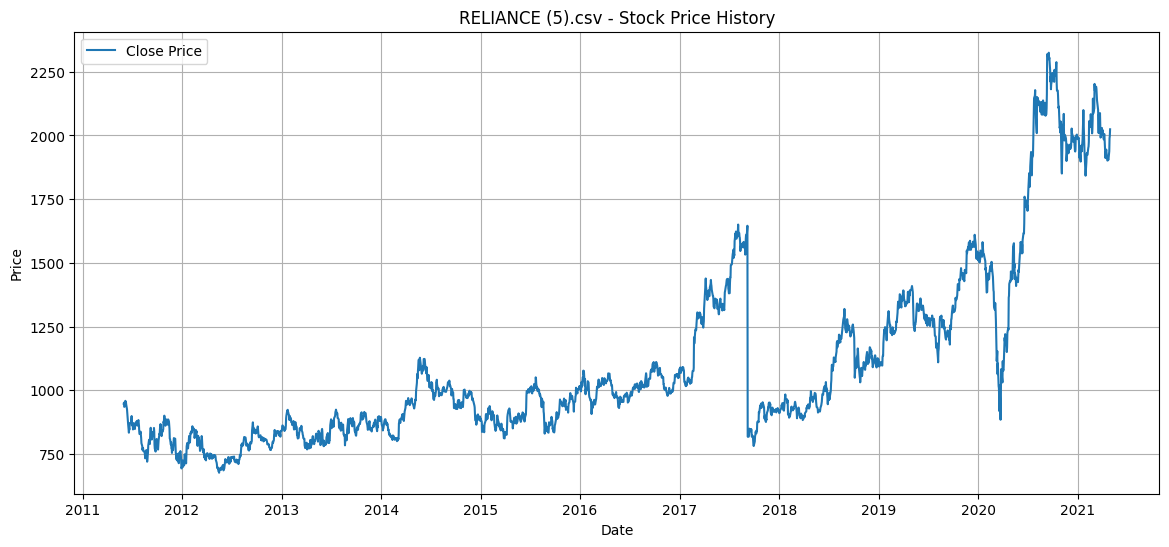

In [12]:
# ✅ STOCK PRICE PREDICTION (NEXT-DAY) WITH MODEL ACCURACY DISPLAYED

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 📤 Upload a single stock CSV file (e.g., INFY.csv)
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# 🧹 Preprocess
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['Next_Close'] = df['Close'].shift(-1)
df['Prev_Close'] = df['Close']
df['5day_MA'] = df['Close'].rolling(window=5).mean()
df = df.dropna()

# 🎯 Features & Target
X = df[['Prev_Close', '5day_MA']]
y = df['Next_Close']

# 🔀 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 🤖 Train
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 📏 Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Model Evaluation for: {filename}")
print(f"MAE   (Mean Absolute Error)       : {mae:.2f}")
print(f"RMSE  (Root Mean Squared Error)   : {rmse:.2f}")
print(f"✅ Model Accuracy (R² Score)       : {r2:.2%}")  # Show as percentage

# 📈 Plot
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual Next-Day Price', linewidth=2)
plt.plot(y_pred, label='Predicted Next-Day Price', linewidth=2)
plt.title(f'{filename} - Next-Day Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 📉 Historical Price Trend
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title(f'{filename} - Stock Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
